## <center> STA160 Final Exam

## <center> Visualization on Weather Data

## <center> 02 June 2022

In [47]:
# Import packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Date time conversions 
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error 
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

# Adjust font size and style on seaborn
sns.set(font_scale=1.5, style="whitegrid")

# Interacting plots
import matplotlib.ticker as ticker

In [48]:
#Read csv data, parse the date columns 
df = pd.read_csv("/Users/selamawit/Desktop/STA160/Final/Data/joined_weather.csv", parse_dates=True)
df

,Unnamed: 0,index,Date,county,tmax_left,tmin_left,Precip_right,average_left,wind_speed
0,0,0,2003-01-01,El Dorado,50.0,42.0,0.080000,46.0,2.7
1,1,1,2003-01-01,Imperial,70.0,37.0,0.000000,53.5,5.6
2,2,2,2003-01-01,Mendocino,46.0,32.0,0.000000,39.0,0.7
3,3,3,2003-01-01,Merced,57.0,34.0,0.008333,45.5,1.8
4,4,4,2003-01-01,Siskyou,45.0,28.0,0.008333,36.5,0.7
...,...,...,...,...,...,...,...,...,...
2329,2329,2329,2010-05-21,Merced,78.0,56.0,0.000000,67.0,12.3
2330,2330,2330,2010-05-22,Merced,71.0,51.0,0.000000,61.0,9.4
2331,2331,2331,2010-05-23,Merced,66.0,51.0,0.000000,58.5,10.7
2332,2332,2332,2010-05-24,Merced,73.0,56.0,0.000000,64.5,5.4


In [49]:
#List column names
list(df.columns)

['Unnamed: 0',
 'index',
 'Date',
 'county',
 'tmax_left',
 'tmin_left',
 'Precip_right',
 'average_left',
 'wind_speed']

In [50]:
#Rearrange the dataframe and rename column names
df = df.reindex(columns=['Date', 'county', 'tmax_left', 'tmin_left', 'Precip_right', 'average_left', 'wind_speed'])
df = df.rename(columns={'tmax_left':'TMAX', 'tmin_left':'TMIN', 'Precip_right':'PRECIP', 'average_left':'Average', 'wind_speed':'Wind'})
df

,Date,county,TMAX,TMIN,PRECIP,Average,Wind
0,2003-01-01,El Dorado,50.0,42.0,0.080000,46.0,2.7
1,2003-01-01,Imperial,70.0,37.0,0.000000,53.5,5.6
2,2003-01-01,Mendocino,46.0,32.0,0.000000,39.0,0.7
3,2003-01-01,Merced,57.0,34.0,0.008333,45.5,1.8
4,2003-01-01,Siskyou,45.0,28.0,0.008333,36.5,0.7
...,...,...,...,...,...,...,...
2329,2010-05-21,Merced,78.0,56.0,0.000000,67.0,12.3
2330,2010-05-22,Merced,71.0,51.0,0.000000,61.0,9.4
2331,2010-05-23,Merced,66.0,51.0,0.000000,58.5,10.7
2332,2010-05-24,Merced,73.0,56.0,0.000000,64.5,5.4


In [51]:
#Brief summary about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2334 non-null   object 
 1   county   2334 non-null   object 
 2   TMAX     2334 non-null   float64
 3   TMIN     2334 non-null   float64
 4   PRECIP   2334 non-null   float64
 5   Average  2334 non-null   float64
 6   Wind     2328 non-null   float64
dtypes: float64(5), object(2)
memory usage: 127.8+ KB


In [52]:
# Check unusual/outliers in data values
df.describe()

,TMAX,TMIN,PRECIP,Average,Wind
count,2334.000000,2334.000000,2334.000000,2334.000000,2328.000000
mean,64.584404,40.453728,0.091338,52.519066,5.582088
std,13.507993,9.899159,0.252411,10.973000,4.194344
min,30.000000,8.000000,0.000000,19.500000,0.000000
25%,54.000000,34.000000,0.000000,44.500000,2.700000
50%,65.000000,41.000000,0.000000,53.000000,4.500000
75%,74.000000,47.000000,0.039066,60.000000,7.200000
max,104.000000,88.000000,3.960000,96.000000,27.300000


In [53]:
#How many counties are in the data?
print(df['county'].nunique())
print(df['county'].unique())

6
['El Dorado' 'Imperial' 'Mendocino' 'Merced' 'Siskyou' 'Riverside']


In [54]:
#Separate the column Date into just Year and Month, Year, and Month
list_YM = [i.split(" ")[0][:-3] for i in  list(df['Date'])]
list_Year = [i.split(" ")[0][0:4] for i in  list(df['Date'])]
list_Month = [i.split(" ")[0][5:7] for i in  list(df['Date'])]

#Create new columns within the existing dataframe
df['YM'] = list_YM
df['Year'] = list_Year
df['Month'] = list_Month

#create monthly dataframe
df_monthly = df.groupby(['county', 'Date', 'YM', 'Year', 'Month']).mean()
df_monthly = df_monthly[['TMAX', 'TMIN', 'PRECIP', 'Wind', 'Average']].reset_index()

#create new column 'season' within the existing dataframe
df_monthly['Month'] = df_monthly['Month'].astype(int)
df_monthly['Season'] = df_monthly['Month']%12 // 3 + 1

df_monthly

,county,Date,YM,Year,Month,TMAX,TMIN,PRECIP,Wind,Average,Season
0,El Dorado,2003-01-01,2003-01,2003,1,50.0,42.0,0.080000,2.70,46.0,1
1,El Dorado,2003-01-02,2003-01,2003,1,44.0,29.0,0.042727,0.90,36.5,1
2,El Dorado,2003-01-03,2003-01,2003,1,53.0,31.0,0.000000,2.20,42.0,1
3,El Dorado,2003-01-04,2003-01,2003,1,64.0,42.0,0.000000,4.30,53.0,1
4,El Dorado,2003-01-05,2003-01,2003,1,69.0,44.0,0.009091,5.60,56.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1753,Siskyou,2010-02-05,2010-02,2010,2,50.0,30.0,0.416875,7.50,40.0,1
1754,Siskyou,2010-02-06,2010-02,2010,2,51.0,38.0,0.115000,2.45,44.5,1
1755,Siskyou,2010-02-07,2010-02,2010,2,50.0,35.0,0.013571,3.60,42.5,1
1756,Siskyou,2010-02-08,2010-02,2010,2,48.0,27.0,0.003846,2.00,37.5,1


In [55]:
#Time period needed to visualize
# df_monthly = df_monthly.loc['2006-01-01':'2007-12-30']
start_date = '2006-01-01'
end_date = '2007-12-30'

# Select DataFrame rows between two dates
mask = (df_monthly['Date'] > start_date) & (df_monthly['Date'] <= end_date)
df_monthly = df_monthly.loc[mask]
df_monthly

,county,Date,YM,Year,Month,TMAX,TMIN,PRECIP,Wind,Average,Season
84,El Dorado,2006-01-02,2006-01,2006,1,53.0,49.0,1.295556,0.40,51.0,1
85,El Dorado,2006-01-03,2006-01,2006,1,49.0,45.0,0.476667,3.60,47.0,1
86,El Dorado,2006-01-04,2006-01,2006,1,52.0,37.0,0.405000,3.10,44.5,1
87,El Dorado,2006-01-05,2006-01,2006,1,53.0,35.0,0.000000,2.50,44.0,1
88,El Dorado,2006-01-06,2006-01,2006,1,70.0,45.0,0.010000,5.40,57.5,1
...,...,...,...,...,...,...,...,...,...,...,...
1713,Siskyou,2007-02-03,2007-02,2007,2,53.0,24.0,0.000000,1.60,38.5,1
1714,Siskyou,2007-02-04,2007-02,2007,2,58.0,26.0,0.000000,2.00,42.0,1
1715,Siskyou,2007-02-05,2007-02,2007,2,53.0,30.0,0.000000,1.55,41.5,1
1716,Siskyou,2007-02-06,2007-02,2007,2,61.0,29.0,0.000000,5.80,45.0,1


## 1.1 Line Graph of Maximum Temperature by Year - Month for Six Counties

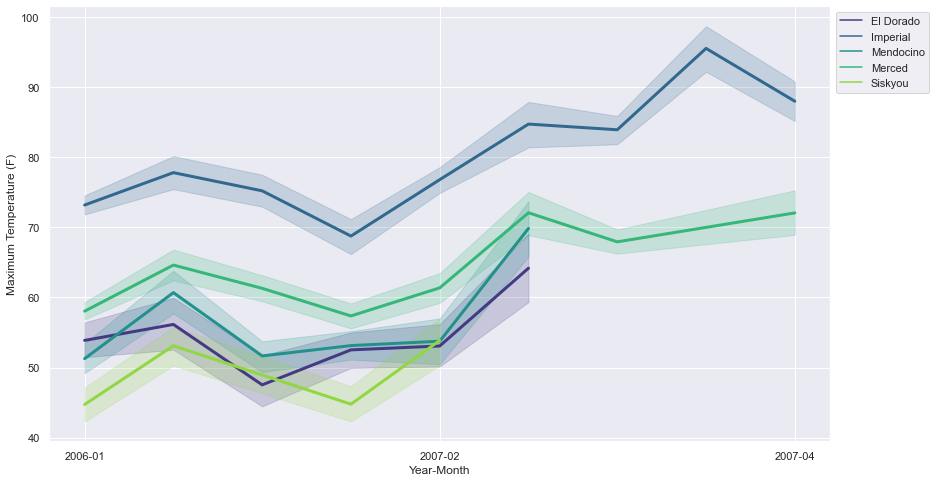

In [57]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'TMAX',
                  hue='county', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Maximum Temperature (F)')
plt.xlabel('Year-Month')
plt.show()


The plot does not provide an intuitive insight since the acquired observation had information only for three month and not throughout the year of 2006 and 2007. Even though, we observe both Imperial and Merced show an uprise in the maximum temperature for the time period between February and April 2007.

## 1.2 Line Graph of Minimum Temperature by Year - Month for Six Counties

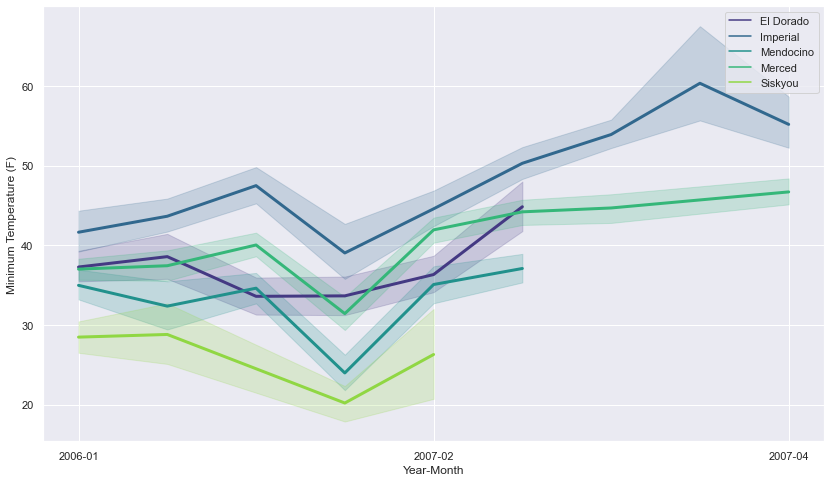

In [62]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'TMIN',
                  hue='county', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Minimum Temperature (F)')
plt.xlabel('Year-Month')
plt.show()

Observation after Feb-2007 are not available for the counties El Dorado, Mendocino and Siskyou. However, for both Imperial and Merced, we observe an upward trending weather indicating between the month February and April, the minimum temperature was warmer in those places.  

## 1.3 Line Graph of Wind Speed (mph) by Year - Month for Six Counties

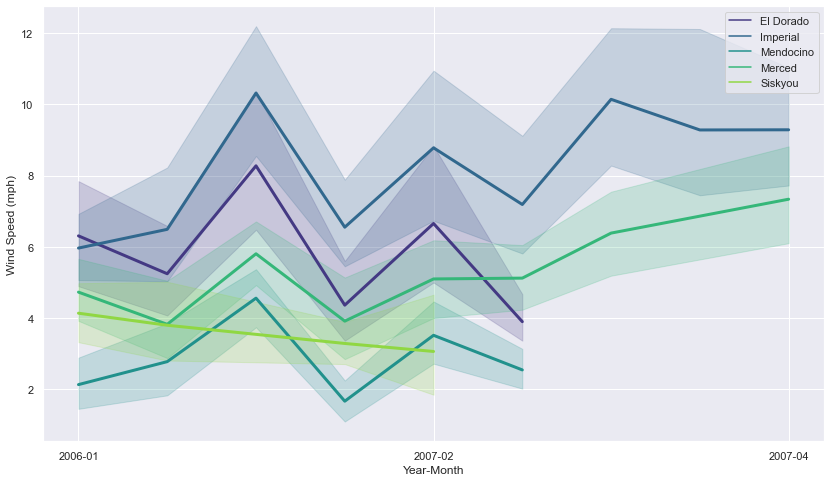

In [59]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'Wind',
                  hue='county', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Year-Month')
plt.show()

Again, El Dorado and Merced show some interesting trends. For instance, we can observe Imperial starts having a windspeed of 6mph on 2006 and eventually increasing to 12th mph and even more for the time period after February 2007. In addition to Merced, which indicates an increase in the windspeed throughout the three months from 4.5mph to around 8mph. 

## 1.4 Line Graph of Rainfall Precipitation by Year - Month for Six Counties

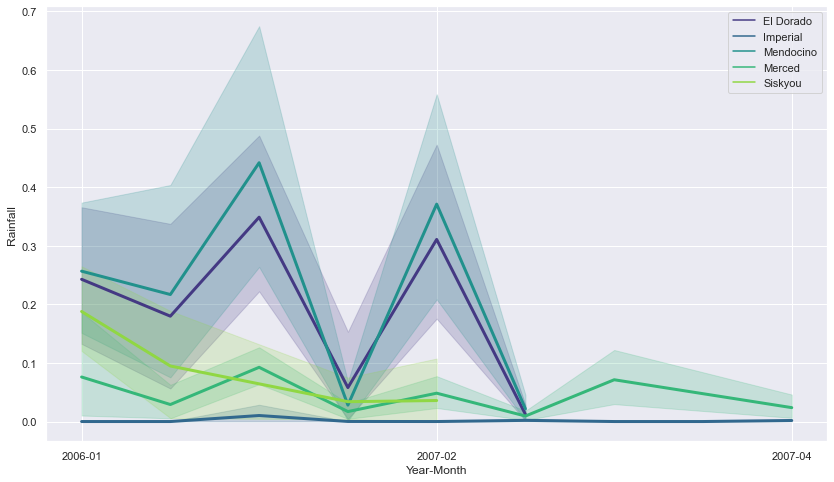

In [63]:
df = df.loc['2006-01-01':'2007-12-30']

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=df_monthly, x ='YM', y = 'PRECIP',
                  hue='county', palette='viridis',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Rainfall')
plt.xlabel('Year-Month')
plt.show()

Surprisingly, the county Imperial had no rainfall throughout the given time period. Whereas, we observe more rainfall occuring in Mendocino, El Dorado and Merced. However due to limited data, we cannot make conclusion on this plot.

## 1.5 Line Graph of Rainfall by Season for Six Counties

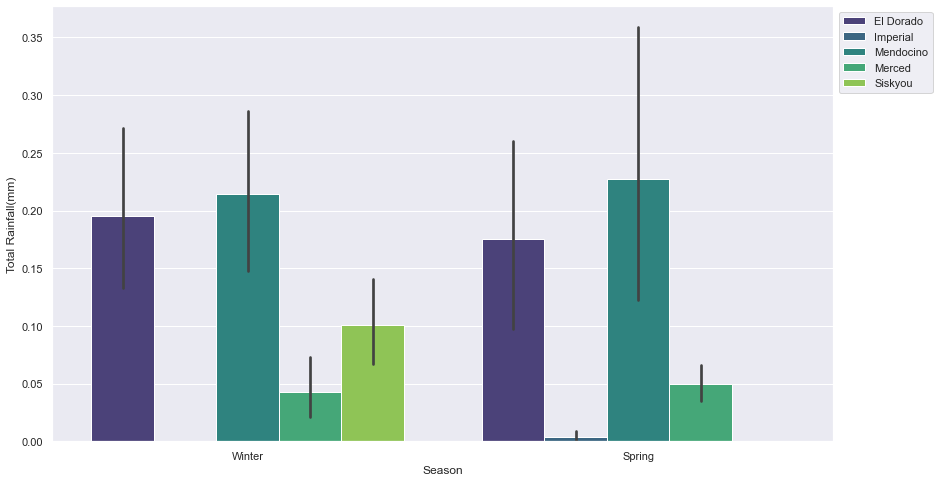

In [64]:
df_monthly["Season"] = df_monthly["Season"].replace([1,2],["Winter","Spring"])
# df_monthly
# print(df_monthly['Season'].nunique())
# print(df_monthly['Season'].unique())

df = df.loc['2006-01-01':'2007-12-30']

sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.barplot(data=df_monthly, x ='Season', y = 'PRECIP',
                  hue='county', palette='viridis')

plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Total Rainfall(mm)')
plt.xlabel('Season')
plt.show()

Here the data was classified by season, however due to limited observation, we only have for observation for Winter and Spring. Similar to the previous plot, Mendocino and El Dorado have relatively more rainfall compared to the other counties. We notice Imperial has the least rainfall on those season. Whereas Siskyou experienced rainfall on winter but never on Spring.

## Conclusion

To conclude from the visualizations of the observation on three months only, the counties Imperial and Merced have experienced some higher maximum temperature and minimum temperature on those month and with less to zero rainfall. In addition, we observe the wind speed have doubled increase for both Imperial and Merced. 
According to the rainfall by seasons, we observe both Mendocino and El Dorado experienced more rainfall on those seasons compared to the other counties. Counties like Imperial and Siskyou experience less rainfall on those seasons.
Finally, due to the incomplete observation and also due to the limited time period of observation given, we fail to rely on the interpretation of the weather visualizations.